<a href="https://colab.research.google.com/github/MahsaMozafariNia/Digits-dataset/blob/master/homework_8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project I am going to perform some classifiers on digit dataset and find the best one (the one which has the best accuracy among others).
Classifiers I am going to look at are SVM, Tree, Forest, Bagging, Adaboost, CNN.

Please use GPU to run the codes. (It will take you lots of times if you use CPU).
Note that, maybe the outputs will be changed when you run the code. So it is not so similar as what I typed in text lines.  

In [0]:

import pandas as pd
import numpy as np
from  sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier


In [0]:

import tensorflow as tf 
tf.test.gpu_device_name() 

'/device:GPU:0'

In [0]:
digits=load_digits(return_X_y=True)
#return_X_y=True in dastoor aks ha ra migire X va lable ha ra y.
X=digits[0]
y=digits[1]

In [0]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [0]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

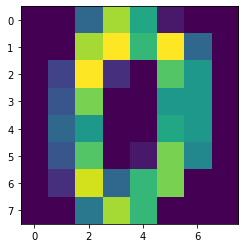

In [0]:
plt.imshow(X[0].reshape(8,8))

Note that images are black and white. these colors are because of the cmap.

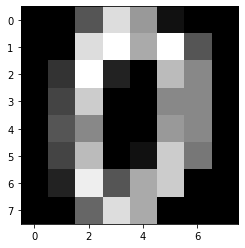

In [0]:
plt.imshow(X[0].reshape(8,8),cmap="gray")

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [0]:
X.shape

(1797, 64)

there is 1797 images of size 8*8
so we have 64 features (Since each (8,8)-matrix, which is correspond to an image, is changed to a vector of size 64).

Now, I am going to apply mentioned classifires on this dataset and estimate best parameters for each classifier.
At the end the best Classifier, which has more accuracy than others, is choosen.

The first one is SVM. 
parameters= 
  C: it is a control parameter in objective function. it means how much the classifier has permitted to misclassified.
  kernel: linear (hyperplane)/ poly (polynomial)/ RBF 

In [0]:
SVM_linear=svm.SVC(C=0.01,kernel="linear")

In [0]:
SVM_linear.fit(X_train,y_train)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
SVM_linear.score(X_test,y_test)

0.9916666666666667

To find the best parameter C we can do cross validation or GridSearchCV.
I am going to perform both of them for C in [0.001,0.01,0.1,1,10,100,1000,10000]

In [0]:
matrix=np.empty((8,2))
counter=-1
for c in [0.001,0.01,0.1,1,10,100,1000,10000]:
  counter=counter+1
  SVM_linear=svm.SVC(C=c,kernel="linear")
  SVM_linear.fit(X_train,y_train)
  matrix[counter,:]=np.array([c,np.mean(cross_val_score(SVM_linear,X_train,y_train,cv=10))])

In [0]:
matrix

array([[1.00000000e-03, 9.79827117e-01],
       [1.00000000e-02, 9.79817405e-01],
       [1.00000000e-01, 9.79817405e-01],
       [1.00000000e+00, 9.79817405e-01],
       [1.00000000e+01, 9.79817405e-01],
       [1.00000000e+02, 9.79817405e-01],
       [1.00000000e+03, 9.79817405e-01],
       [1.00000000e+04, 9.79817405e-01]])

In [0]:
matrix[np.argmax(matrix[:,1]),0]

0.001

In [0]:
SVM_grid=svm.SVC()
param={'C':[0.001,0.01,0.1,1,10,100,1000,10000],'kernel':['linear']}
SVM_grid=GridSearchCV(SVM_grid,param_grid=param,scoring="accuracy",cv=10)

In [0]:
SVM_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
SVM_grid.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [0]:
#matrix=np.empty((990,2))
#counter=-1
#for c in np.arange(0.01,1,0.001):
#  print(counter)
#  counter=counter+1
#  SVM_linear=svm.SVC(C=c,kernel="linear")
#  SVM_linear.fit(X_train,y_train)
#  matrix[counter,:]=np.array([c,np.mean(cross_val_score(SVM_linear,X_train,y_train,cv=10))])



In [0]:
#max_index=np.argmax(matrix[:,1])
#print(matrix[max_index,:])

Now, I chenged the range of C. becuase you see that the best value for C in [0.001,0.01,0.1,1,10,100,1000,10000] was c equal 0.001.

In [0]:
matrix=np.empty((11,2))
counter=-1
for c in np.arange(0.01,11,1):
  counter=counter+1
  SVM_linear=svm.SVC(C=c,kernel="linear")
  SVM_linear.fit(X_train,y_train)
  matrix[counter,:]=np.array([c,np.mean(cross_val_score(SVM_linear,X_train,y_train,cv=10))])


In [0]:
max_index=np.argmax(matrix[:,1])
print(matrix[max_index,:])

[0.01      0.9798174]


Now, I am going to use GridSearchCv this time.

In [0]:
SVM_linear_grid=svm.SVC()
param={'C':np.arange(0.01,11,1),'kernel':['linear']}
SVM_linear_grid=GridSearchCV(SVM_linear_grid,param_grid=param,scoring="accuracy",cv=10)

In [0]:
SVM_linear_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.000e-02, 1.010e+00, 2.010e+00, 3.010e+00, 4.010e+00, 5.010e+00,
       6.010e+00, 7.010e+00, 8.010e+00, 9.010e+00, 1.001e+01]),
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
SVM_linear_grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [0]:
SVM_linear_grid.best_score_

0.9798174048174048

So the best C in np.arange(0.01,1,0.001) for linear kernel is c=0.01 with accuracy=0.9805167.
Now, to get the best estimator and fit it on trainning set I should do as follows:
SVM_linear_grid.best_estimator_.fit(X_train,y_train)


In [0]:
SVM_linear_grid.best_estimator_

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Now, if I want to find best parameters of svm for different kernels, we should write several for loops for c, gamma and degree.

after finding best params for each type of svm(linear, poly, RBF), I should compare their accuracy and choose the best kernel with best params.


But the easier way is using GridSearchCV, it first gets all kernels, all params and cv and then find the best method(best kernel and best params).  
I am going to crossvalidate the hyperparameters 𝑐, γ, degree of polynomial 𝑑 and three kernels (linear, rbf and poly) and find the best setting.

In [0]:
SVM_total=svm.SVC()
hyperparameters={'C':np.arange(0.01,11,1),'kernel':['linear','poly','rbf'],'gamma':np.arange(0.001,0.01,0.001),'degree':[2,3,4,5,6,7,8,9,10]}
SVM_total=GridSearchCV(SVM_total,param_grid=hyperparameters,scoring="accuracy",cv=10)




---


---


The next code tooks me about 1 hour I think to run. Be patient please. You can change the cv parameter to an integer less than 10 or change the range of other parameters, 
it may help reduce execution time.

---



---



In [0]:
SVM_total.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.000e-02, 1.010e+00, 2.010e+00, 3.010e+00, 4.010e+00, 5.010e+00,
       6.010e+00, 7.010e+00, 8.010e+00, 9.010e+00, 1.001e+01]),
                         'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]),
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
SVM_total.best_params_

{'C': 1.01, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}

so, kernel rbf with parameters {'C': 2.01, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'} has the best accuracy. First, I am going to save it as Best_SVM and at the end I will compare it's test accuracy with other classifiers's accuracy. 

In [0]:
SVM_total.best_score_

0.9902534965034965

In [0]:
Best_SVM=SVM_total.best_estimator_
Best_SVM

SVC(C=1.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
Best_SVM.fit(X_train,y_train)
print("\n train score",Best_SVM.score(X_train,y_train),"\n test score",Best_SVM.score(X_test,y_test))


 train score 0.9993041057759221 
 test score 0.9916666666666667


In [0]:
y_pred_svm=Best_SVM.predict(X_test)
confusion_matrix(y_test,y_pred_svm)

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 44]])

If a test score is high, it dose not mean that the model predicts all of the classes very good. Maybe it has  good predictions for just 9 calsses but the last class has a low accuracy.  
It is better to have a look on confusion matrix to be sure weather the accuracy is good on not.

It can be easily seen that, Best_SVM predicts all of the classes 0 to 7 accurately and there are just three misclassification in classes 8 and  9.

Now, it is time to apply GridSearchCV to Tree, Forest, Boosting and Bagging to find the best parameters of these classifiers.

#**Dicision Tree**

In [0]:
Tree= tree.DecisionTreeClassifier()
param={'max_depth':np.arange(1,100,10)}
Tree_grid=GridSearchCV(Tree,param_grid=param,scoring='accuracy',cv=10,verbose=1)

In [0]:
Tree_grid.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 

In [0]:
print("best params: ",Tree_grid.best_params_,"\n best score: ",Tree_grid.best_score_)

best params:  {'max_depth': 51} 
 best score:  0.8621794871794872


In [0]:
Best_Tree=Tree_grid.best_estimator_
Best_Tree.fit(X_train,y_train)
print("\n train score",Best_Tree.score(X_train,y_train),"\n test score",Best_Tree.score(X_test,y_test))
y_pred_tree=Best_Tree.predict(X_test)
confusion_matrix(y_test,y_pred_tree)


 train score 1.0 
 test score 0.85


array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  1,  2,  0,  0,  0,  0,  0,  1],
       [ 1,  0, 30,  0,  0,  0,  2,  0,  5,  0],
       [ 0,  1,  2, 37,  0,  2,  0,  1,  1,  0],
       [ 0,  2,  0,  0, 30,  1,  0,  0,  0,  1],
       [ 3,  0,  0,  0,  0, 28,  0,  2,  0,  0],
       [ 1,  1,  0,  0,  3,  0, 26,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 32,  1,  0],
       [ 2,  0,  3,  3,  0,  0,  0,  0, 21,  2],
       [ 0,  0,  0,  3,  0,  1,  0,  1,  4, 37]])

ِDue to the confusion matrix we can see that in this train-test split, Best_SVM is more accurate than Best_Tree.

#**Random Forest**

In [0]:
Forest=RandomForestClassifier()
params={'n_estimators':range(2,101),'max_features':['auto'],'max_depth':np.arange(1,100,10)}
Forest_grid=GridSearchCV(Forest,param_grid=params,scoring='accuracy',cv=10,verbose=1)
Forest_grid.fit(X_train,y_train)

Fitting 10 folds for each of 990 candidates, totalling 9900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9900 out of 9900 | elapsed: 22.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [0]:
print("best params: ",Forest_grid.best_params_,"\n best score: ", Forest_grid.best_score_)

best params:  {'max_depth': 41, 'max_features': 'auto', 'n_estimators': 65} 
 best score:  0.9791035353535353


In [0]:
Best_Forest=Forest_grid.best_estimator_

In [0]:

Best_Forest.fit(X_train,y_train)
print("\n train score",Best_Forest.score(X_train,y_train),"\n test score",Best_Forest.score(X_test,y_test))
y_pred_Forest=Best_Forest.predict(X_test)
confusion_matrix(y_test,y_pred_Forest)


 train score 1.0 
 test score 0.9694444444444444


array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  0, 32,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  2, 43]])

#**Bagging**

In [0]:
Bag=BaggingClassifier()
params={'base_estimator':[Best_Tree],'n_estimators':range(2,101)}
Bag_grid=GridSearchCV(Bag,param_grid=params,scoring='accuracy',cv=10,verbose=1)


In [0]:
Bag_grid.fit(X_train,y_train)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 990 out of 990 | elapsed:  9.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_we...
                                                                   criterion='gini',
                                                                   max_depth=51,
                                                                   max_features=None,
                                                                  

In [0]:
print("best params: ",Bag_grid.best_params_,"\n best score: ", Bag_grid.best_score_)

best params:  {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=51, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'n_estimators': 69} 
 best score:  0.9470959595959595


In [0]:
Best_Bag=Bag_grid.best_estimator_

In [0]:
Best_Bag.fit(X_train,y_train)
print("\n train score",Best_Bag.score(X_train,y_train),"\n test score",Best_Bag.score(X_test,y_test))
y_pred_Bag=Best_Bag.predict(X_test)
confusion_matrix(y_test,y_pred_Bag)


 train score 1.0 
 test score 0.9361111111111111


array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  1,  0,  1,  0,  0,  0,  1],
       [ 0,  1,  2, 39,  0,  0,  0,  1,  1,  0],
       [ 0,  1,  0,  0, 32,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  2,  1, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 26,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  2, 43]])

#**Boosting**

In [0]:
Boost=AdaBoostClassifier()
params={'base_estimator':[Best_Tree],'n_estimators':range(2,101)}
Boost_grid=GridSearchCV(Boost,param_grid=params,scoring='accuracy',cv=10,verbose=1)

In [0]:
Boost_grid.fit(X_train,y_train)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 990 out of 990 | elapsed:   17.6s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weight=None,
                                                                   criterion='gini',
                                                                   max_depth=51,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                   

In [0]:
print("best params: ",Boost_grid.best_params_,"\n best score: ", Boost_grid.best_score_)

best params:  {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=51, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'n_estimators': 70} 
 best score:  0.863568376068376


In [0]:
Best_boost=Boost_grid.best_estimator_

In [0]:
Best_boost.fit(X_train,y_train)
print("\n train score",Best_boost.score(X_train,y_train),"\n test score",Best_boost.score(X_test,y_test))
y_pred_Boost=Best_boost.predict(X_test)
confusion_matrix(y_test,y_pred_Boost)


 train score 1.0 
 test score 0.8583333333333333


array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  1,  1,  0,  0,  0,  0,  0,  1],
       [ 1,  0, 30,  0,  1,  0,  1,  0,  5,  0],
       [ 0,  2,  1, 37,  0,  1,  0,  1,  1,  1],
       [ 0,  3,  0,  0, 29,  0,  0,  0,  0,  2],
       [ 3,  0,  0,  0,  0, 28,  0,  2,  0,  0],
       [ 0,  1,  1,  0,  2,  0, 27,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 32,  1,  0],
       [ 0,  1,  1,  5,  0,  0,  0,  0, 23,  1],
       [ 2,  1,  0,  2,  0,  1,  0,  1,  2, 37]])

In this part, I am goinig to apply a CNN on the dataset and find it's best parammeters.
As you know in CNN, there are lots of parameters which must find such that give us the best accuracy.
There are the wigth of edges between units in defferent layers and also biad of each layer.
Also, in CNN we should find each of the elements in filters...

Because there are so many parameters in NN, and it will take forever to crossvalidate all these parameters.
Also if we use GridSearchCV, because there are lots of combinations, it will take us days.

There is another method, named RandomizedSearchCv. It's performance is the same as GridSearchCV, but in this method instead of investigating each of combinations, it will choose some of them randomly.

Suppose that there are 4 parameters to find.
epochs:range(10)
batchs:range(100)
filter_size=[3,4,5]
number of filters in each layer:range(10)

Hence, there are 10*100*3*10 combinations.



#**RandomizedSearchCV and CNN**

In [0]:
X_train=X_train.reshape((X_train.shape[0],8,8,1))
X_test=X_test.reshape((X_test.shape[0],8,8,1))

In next line, I am going to write a function that gives some parameters of CNN. (CNN that I am going to fit, has 2 Convolutional layares and one dense layer.)
Also, It can be a pooling layer (I think it is like resizing images). 

In [0]:
def bl_model(number_filter1,number_filter2,kernel1,kernel2,number_units,rate,dro):    
  model=keras.models.Sequential()
  model.add(keras.layers.Conv2D(filters=number_filter1, kernel_size=kernel1, strides=1, activation='elu', input_shape=(8,8,1), padding='same'))
  model.add(keras.layers.Conv2D(filters=number_filter2, kernel_size=kernel2, strides=1, activation='relu'))
  model.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
  model.add(keras.layers.Flatten())
  if dro==True:
    model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(number_units, activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))
  model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return(model)

In [0]:
model_drop=bl_model(100,100,3,3,10,0.001,True)

In [0]:
m=model_drop.fit(X_train,y_train,batch_size=50,epochs=10,verbose=2,validation_split=0.1)

Epoch 1/10
26/26 - 0s - loss: 2.0980 - accuracy: 0.1895 - val_loss: 1.8120 - val_accuracy: 0.3611
Epoch 2/10
26/26 - 0s - loss: 1.7094 - accuracy: 0.3735 - val_loss: 1.5142 - val_accuracy: 0.4653
Epoch 3/10
26/26 - 0s - loss: 1.4718 - accuracy: 0.4749 - val_loss: 1.2826 - val_accuracy: 0.4653
Epoch 4/10
26/26 - 0s - loss: 1.2197 - accuracy: 0.5893 - val_loss: 1.0319 - val_accuracy: 0.6597
Epoch 5/10
26/26 - 0s - loss: 0.9100 - accuracy: 0.6798 - val_loss: 0.6153 - val_accuracy: 0.8125
Epoch 6/10
26/26 - 0s - loss: 0.6004 - accuracy: 0.8012 - val_loss: 0.3563 - val_accuracy: 0.8958
Epoch 7/10
26/26 - 0s - loss: 0.3351 - accuracy: 0.8871 - val_loss: 0.1777 - val_accuracy: 0.9514
Epoch 8/10
26/26 - 0s - loss: 0.2523 - accuracy: 0.9273 - val_loss: 0.1417 - val_accuracy: 0.9583
Epoch 9/10
26/26 - 0s - loss: 0.1656 - accuracy: 0.9551 - val_loss: 0.1653 - val_accuracy: 0.9514
Epoch 10/10
26/26 - 0s - loss: 0.1744 - accuracy: 0.9528 - val_loss: 0.1180 - val_accuracy: 0.9722


In [0]:
model_drop.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 100)         1000      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 100)         90100     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 100)         0         
_________________________________________________________________
flatten (Flatten)            (None, 900)               0         
_________________________________________________________________
dropout (Dropout)            (None, 900)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                9010      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In the first convolutional layer we have 100 filters and each filter is a 3*3 matrix, so it has 900 parameters. Also each filter has a bias, hence the number of all parameters in this layer is equal 1000.

In the first dence layer we have 10 units and the number of inputs are 900. so we have 900*10 edges and each edge has a weigth as a parameter. Also each unit has a bias, so the number of all parameters in this layer is 9010.


previous line gives us number of parameters in each layes.

In [0]:
model_no_drop=bl_model(2,2,3,3,10,0.001,False)

In [0]:
model_no_drop.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 8, 8, 2)           20        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 2)           38        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 2)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                190       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 358
Trainable params: 358
Non-trainable params: 0
________________________________________________________

In [0]:
hyperparametes={'number_filter1':[16,32,64,128],'number_filter2':[32,64,128,256,552],'kernel1':[2,3,4,5,6,7],'kernel2':[2,3,4,5,6,7],'number_units':[20,40,60,80,100,120,140],'rate':[0.001,0.01,1],'epochs':[10,20,30,40,50],'batch_size':[50,100,150,200],'dro':[True,False]}

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
final_model=KerasClassifier(bl_model)

In [0]:
cnn=RandomizedSearchCV(final_model,param_distributions=hyperparametes, n_iter=10, scoring='accuracy', cv=5)

In [0]:
cnn.fit(X_train,y_train)

Epoch 1/20
12/12 [==============================] - 0s 5ms/step - loss: 2.0531 - accuracy: 0.2654
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 1.2782 - accuracy: 0.5500
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.9692 - accuracy: 0.6719
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 0.7183 - accuracy: 0.7824
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.5822 - accuracy: 0.8225
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.8390
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.8729
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 0.3539 - accuracy: 0.8808
Epoch 9/20
12/12 [==============================] - 0s 3ms/step - loss: 0.3063 - accuracy: 0.9077
Epoch 10/20
12/12 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.9234
Epoch 11/20
12/12 [

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fd97fb93c88>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'batch_size': [50, 100, 150, 200],
                                        'dro': [True, False],
                                        'epochs': [10, 20, 30, 40, 50],
                                        'kernel1': [2, 3, 4, 5, 6, 7],
                                        'kernel2': [2, 3, 4, 5, 6, 7],
                                        'number_filter1': [16, 32, 64, 128],
                                        'number_filter2': [32, 64, 128, 256,
                                                           552],
                                        'number_units': [20, 40, 60, 80, 100,
                                                         120, 140],
                                        'rate': [0.001, 0.01, 1]},
             

In [0]:
cnn.best_params_

{'batch_size': 100,
 'dro': True,
 'epochs': 20,
 'kernel1': 3,
 'kernel2': 2,
 'number_filter1': 128,
 'number_filter2': 128,
 'number_units': 80,
 'rate': 0.001}

In [0]:
cnn.best_score_

0.9895639759969029

In [0]:
cnn.cv_results_

{'mean_fit_time': array([1.25823998, 1.35873747, 3.43187518, 1.13983736, 1.1866272 ,
        1.1239203 , 2.92689252, 1.05397439, 2.89527588, 1.3764327 ]),
 'mean_score_time': array([0.07718868, 0.06536703, 0.06761079, 0.06618423, 0.0640748 ,
        0.10873594, 0.06728435, 0.07009654, 0.06971297, 0.06665902]),
 'mean_test_score': array([0.9770422 , 0.98956398, 0.10023713, 0.0911658 , 0.97217141,
        0.97912069, 0.59026568, 0.24471061, 0.10020083, 0.98398664]),
 'param_batch_size': masked_array(data=[100, 100, 50, 150, 100, 200, 50, 200, 50, 150],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_dro': masked_array(data=[True, True, False, False, False, False, True, False,
                    False, False],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=objec

In [0]:
Best_cnn=cnn.best_estimator_


In [0]:
Best_cnn.fit(X_train,y_train)

Epoch 1/20
15/15 [==============================] - 0s 4ms/step - loss: 1.5222 - accuracy: 0.4983
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 0.4481 - accuracy: 0.8455
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 0.2290 - accuracy: 0.9193
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 0.1322 - accuracy: 0.9589
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0856 - accuracy: 0.9736
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.9729
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.9749
Epoch 8/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.9784
Epoch 9/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9875
Epoch 10/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9889
Epoch 11/20
15/15 [

In [0]:

print("\n train score",Best_cnn.score(X_train,y_train),"\n test score",Best_cnn.score(X_test,y_test))


4/4 [==============================] - 0s 7ms/step - loss: 0.0367 - accuracy: 0.9861

 train score 1.0 
 test score 0.9861111044883728


In [0]:
y_pred_cnn=Best_cnn.predict(X_test)
confusion_matrix(y_test,y_pred_cnn)

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 44]])

Now, I want to compare all of the methods for different train and test split.
after the for loop, I calculate mean and std of test accuracy for each of the method and compare their Confidence intervals to find the best accuracy and method (In terms of statistics)

Because of the CNN and 1000 train test split, it takes you lots of time. If you do not have enough time, you can reduce the number of steps in the for loop.

In [0]:
list_svm=[];list_tree=[];list_forest=[];list_bag=[];list_boost=[];list_CNN=[]
for i in range(1000):
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
 XX_train=X_train.reshape((X_train.shape[0],8,8,1))
 XX_test=X_test.reshape((X_test.shape[0],8,8,1))
 Best_SVM.fit(X_train,y_train)
 Best_Tree.fit(X_train,y_train)
 Best_Forest.fit(X_train,y_train)
 Best_Bag.fit(X_train,y_train)
 Best_boost.fit(X_train,y_train)
 Best_cnn.fit(XX_train,y_train)
 list_svm.append(Best_SVM.score(X_test,y_test))
 list_tree.append(Best_Tree.score(X_test,y_test))
 list_forest.append(Best_Forest.score(X_test,y_test))
 list_bag.append(Best_Bag.score(X_test,y_test))
 list_boost.append(Best_boost.score(X_test,y_test))
 list_CNN.append(Best_cnn.score(XX_test,y_test))

Streaming output truncated to the last 5000 lines.
15/15 [==============================] - 0s 3ms/step - loss: 0.6002 - accuracy: 0.8128
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 0.2385 - accuracy: 0.9297
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 0.1504 - accuracy: 0.9534
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 0.1113 - accuracy: 0.9617
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0839 - accuracy: 0.9666
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.9729
Epoch 8/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.9791
Epoch 9/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9882
Epoch 10/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9861
Epoch 11/20
15/15 [==============================] - 0s 4ms/step - loss: 0.03

In [0]:
Mean_Std=pd.DataFrame([[np.mean(list_svm),np.std(list_svm)],[np.mean(list_tree),np.std(list_tree)],[np.mean(list_forest),np.std(list_forest)],[np.mean(list_bag),np.std(list_bag)],[np.mean(list_boost),np.std(list_boost)],[np.mean(list_CNN),np.std(list_CNN)]]
                      ,index=['SVM',"Tree","Forest","Bag","Boost","CNN"],columns=["Mean","std"])

In [0]:
Mean_Std

,Mean,std
SVM,0.990294,0.004872
Tree,0.850914,0.018572
Forest,0.973608,0.008154
Bag,0.948542,0.012630
Boost,0.850331,0.018626
CNN,0.988489,0.005704


calculating the confidence intervals.


In [0]:
Intervals=pd.DataFrame(index=["SVM","Tree","Forest","Bag","Boost","CNN"])
Intervals.loc["SVM",0]=np.mean(list_svm)-1.96*(np.std(list_svm)/np.sqrt(1000))
Intervals.loc["SVM",1]=np.mean(list_svm)+1.96*(np.std(list_svm)/np.sqrt(1000))
Intervals.loc["Tree",0]=np.mean(list_tree)-1.96*(np.std(list_tree)/np.sqrt(1000))
Intervals.loc["Tree",1]=np.mean(list_tree)+1.96*(np.std(list_tree)/np.sqrt(1000))
Intervals.loc["Forest",0]=np.mean(list_forest)-1.96*(np.std(list_forest)/np.sqrt(1000))
Intervals.loc["Forest",1]=np.mean(list_forest)+1.96*(np.std(list_forest)/np.sqrt(1000))
Intervals.loc["Bag",0]=np.mean(list_bag)-1.96*(np.std(list_bag)/np.sqrt(1000))
Intervals.loc["Bag",1]=np.mean(list_bag)+1.96*(np.std(list_bag)/np.sqrt(1000))
Intervals.loc["Boost",0]=np.mean(list_boost)-1.96*(np.std(list_boost)/np.sqrt(1000))
Intervals.loc["Boost",1]=np.mean(list_boost)+1.96*(np.std(list_boost)/np.sqrt(1000))
Intervals.loc["CNN",0]=np.mean(list_CNN)-1.96*(np.std(list_CNN)/np.sqrt(1000))
Intervals.loc["CNN",1]=np.mean(list_CNN)+1.96*(np.std(list_CNN)/np.sqrt(1000))
Intervals

,0,1
SVM,0.989992,0.990596
Tree,0.849763,0.852065
Forest,0.973103,0.974114
Bag,0.947759,0.949324
Boost,0.849176,0.851485
CNN,0.988135,0.988842


The confidence interval of svm  have no intersection with other intervals and it's first element is bigger than others. Hence SVM is better than others for prediction of this data set. 